## Task 4 - Satisfaction Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

G:\sanket\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
original_data = pd.read_csv('C:\\Users\\Sanket\\AI course DIGIChrome\\Intership Programm\\original_data.csv')


In [3]:
experience_Cluster = pd.read_csv('C:\\Users\\Sanket\\AI course DIGIChrome\\Intership Programm\\experience_Cluster.csv')


In [4]:
engagement_cluster = pd.read_csv('C:\\Users\\Sanket\\AI course DIGIChrome\\Intership Programm\\Cluster.csv')

In [5]:
print(original_data.index)
print(experience_Cluster.index)
print(engagement_cluster.index)


RangeIndex(start=0, stop=150001, step=1)
RangeIndex(start=0, stop=106857, step=1)
RangeIndex(start=0, stop=150001, step=1)


In [6]:
common_index = range(min(len(original_data), len(experience_Cluster), len(engagement_cluster)))

# Reindexing DataFrames to have the same index range
original_data = original_data.reindex(common_index)
experience_Cluster = experience_Cluster.reindex(common_index)
engagement_cluster = engagement_cluster.reindex(common_index)


In [7]:
original_data['experience_column'] = experience_Cluster['experience_Cluster']
original_data['engagement_column'] = engagement_cluster['Cluster']


In [8]:
engagement_cluster.columns

Index(['MSISDN/Number', 'Cluster'], dtype='object')

In [9]:
experience_Cluster.columns

Index(['experience_Cluster'], dtype='object')

In [10]:
engagement_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                      'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Social Media DL (Bytes)',
                      'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
                      'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                      'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
                      'Other UL (Bytes)']

experience_columns = ['HTTP DL (Bytes)', 'HTTP UL (Bytes)',
                      'Activity Duration DL (ms)', 'Activity Duration UL (ms)']


In [11]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Calculate centroids of the clusters
engagement_centroid = original_data.groupby('engagement_column')[engagement_columns].mean()  
experience_centroid = original_data.groupby('experience_column')[experience_columns].mean()

# Calculate engagement score
original_data['engagement_score'] = original_data.apply(lambda row: distance.euclidean(row[engagement_columns], engagement_centroid.loc[row['engagement_column']]), axis=1)

# Calculate experience score
original_data['experience_score'] = original_data.apply(lambda row: distance.euclidean(row[experience_columns], experience_centroid.loc[row['experience_column']]), axis=1)


### Calculating Satisfaction Score:

In [12]:

original_data['satisfaction_score'] = (original_data['engagement_score'] + original_data['experience_score']) / 2


In [13]:
original_data['satisfaction_score']

0         1.396761e+08
1         5.775962e+07
2         3.762573e+07
3         1.994132e+08
4         7.308388e+07
              ...     
106852    1.951226e+08
106853    8.616676e+07
106854    1.342128e+08
106855    2.364234e+08
106856    1.702072e+08
Name: satisfaction_score, Length: 106857, dtype: float64

### Geting top 10 satisfied customers

In [14]:
top_10_satisfied = original_data.nlargest(10, 'satisfaction_score')


In [15]:
top_10_satisfied

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),experience_column,engagement_column,engagement_score,experience_score,satisfaction_score
38741,7.277830e+18,25-04-2019 03:03,953.0,26-04-2019 03:03,911.0,86399.0,2.082020e+14,3.376273e+10,8.637690e+13,T84808A,...,12853492.0,836620106.0,9959925.0,52376583.0,338657191.0,0,0,4.539153e+08,7.242196e+10,3.643794e+10
59615,1.304240e+19,26-04-2019 02:23,274.0,27-04-2019 01:26,569.0,82977.0,2.082020e+14,3.376389e+10,8.637690e+13,T79064A,...,768765.0,367305418.0,13903306.0,21299798.0,372900528.0,0,1,2.436247e+08,6.787061e+10,3.405712e+10
35923,7.277830e+18,25-04-2019 01:24,51.0,26-04-2019 01:24,50.0,86399.0,2.082010e+14,3.365912e+10,8.637690e+13,D93250B,...,8655150.0,298914727.0,16162287.0,55674133.0,332014787.0,0,0,2.106133e+08,6.445469e+10,3.233265e+10
78083,7.277830e+18,27-04-2019 03:08,780.0,28-04-2019 03:08,680.0,86399.0,2.082020e+14,3.376392e+10,8.637690e+13,D71951C,...,5462206.0,735027253.0,13526355.0,31761804.0,634893558.0,0,2,3.167507e+08,6.420512e+10,3.226094e+10
39971,1.304240e+19,25-04-2019 03:45,125.0,26-04-2019 03:45,12.0,86399.0,2.082010e+14,3.366048e+10,8.637690e+13,T79610B,...,16347406.0,821738413.0,9030202.0,59831931.0,122690152.0,0,0,4.172662e+08,4.663821e+10,2.352774e+10
38534,1.304240e+19,25-04-2019 02:55,106.0,26-04-2019 02:55,128.0,86400.0,2.082010e+14,3.366946e+10,8.637690e+13,D93814B,...,9788883.0,778416784.0,3757587.0,25045029.0,66951382.0,1,0,3.922927e+08,4.532088e+10,2.285659e+10
66911,1.304240e+19,26-04-2019 07:40,585.0,27-04-2019 07:40,539.0,86399.0,2.082010e+14,3.365049e+10,8.637690e+13,L76635A,...,12857966.0,699334248.0,5749534.0,25601144.0,484569261.0,0,1,3.873483e+09,4.039541e+10,2.213445e+10
49651,1.311450e+19,25-04-2019 07:53,318.0,26-04-2019 07:51,559.0,86293.0,2.082010e+14,3.365992e+10,8.639550e+13,D50155B,...,11889686.0,716959405.0,15486792.0,65497968.0,143489472.0,0,0,3.092998e+08,4.330913e+10,2.180921e+10
67301,1.304240e+19,26-04-2019 07:44,679.0,27-04-2019 07:44,664.0,86399.0,2.082020e+14,3.369892e+10,8.637690e+13,D26827A,...,12373873.0,771321637.0,848632.0,28228666.0,142889954.0,0,0,4.029453e+08,4.075996e+10,2.058145e+10
81193,1.304240e+19,27-04-2019 08:58,370.0,28-04-2019 00:33,53.0,56123.0,2.082010e+14,3.366908e+10,8.637690e+13,D71719B,...,7978121.0,802846594.0,8048607.0,32873607.0,808310981.0,0,1,4.419738e+08,3.983368e+10,2.013782e+10


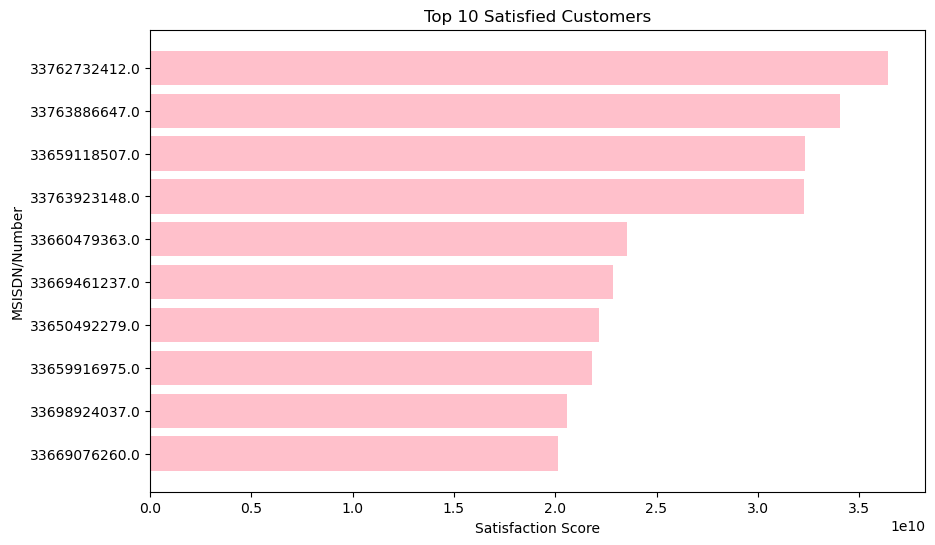

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_satisfied)), top_10_satisfied['satisfaction_score'], color='pink')
plt.yticks(range(len(top_10_satisfied)), top_10_satisfied['MSISDN/Number'])  # Custom y-axis ticks and labels
plt.xlabel('Satisfaction Score')
plt.ylabel('MSISDN/Number')
plt.title('Top 10 Satisfied Customers')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()

### Building regression model for predicting the satisfaction score of a customer

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = ['engagement_score', 'experience_score']  # Actual column names

# Splitting the data into features (X) and target variable (y)
X = original_data[features]
y = original_data['satisfaction_score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 5.853813739916451e-13
R-squared: 1.0


In [18]:
y_test

21377    8.629231e+07
22356    1.962044e+08
42414    1.645655e+08
95160    2.566176e+08
61074    1.251425e+09
             ...     
57023    2.188545e+08
39594    1.664308e+08
36906    1.570436e+08
16701    1.689432e+08
92311    1.104815e+08
Name: satisfaction_score, Length: 21372, dtype: float64

In [19]:
y_pred

array([8.62923080e+07, 1.96204440e+08, 1.64565542e+08, ...,
       1.57043569e+08, 1.68943181e+08, 1.10481458e+08])

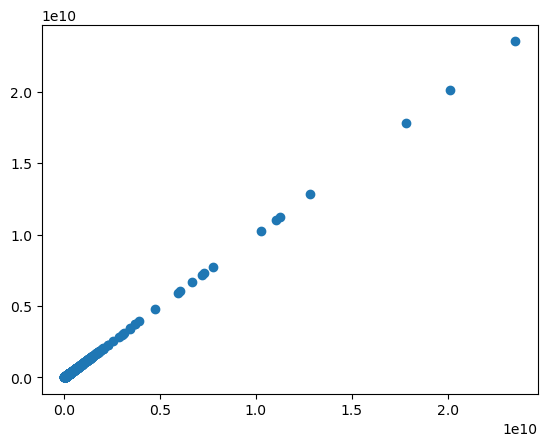

In [21]:
#Visualizing model test data against result data 
plt.scatter(y_test,y_pred)
plt.show()

### model deployment and model testing by entering engagement score and experience score get the value of statisfaction score

In [23]:
import pickle

pickle.dump(model,open('model_telco.pkl','wb'))

In [24]:
model_telco=pickle.load(open('model_telco.pkl','rb'))

In [25]:
print(model.predict([[4.539153e+08,7.242196e+10]]))

[3.64379377e+10]


G:\sanket\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Runing a k-means (k=2) on the engagement & the experience score

In [26]:
from sklearn.cluster import KMeans

# Assuming 'engagement_score' and 'experience_score' are columns in original_data
engagement_experience = original_data[['engagement_score', 'experience_score']]

# Run KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(engagement_experience)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
original_data['cluster_labels'] = cluster_labels


### Aggregating the average satisfaction & experience score per cluster. 

In [27]:
# 'cluster_labels' contains the cluster labels obtained from k-means clustering

# Group by 'cluster_labels' and calculate average satisfaction & experience scores
cluster_scores = original_data.groupby('cluster_labels')[['satisfaction_score', 'experience_score']].mean()

print(cluster_scores)


                satisfaction_score  experience_score
cluster_labels                                      
0                     1.689760e+08      7.741447e+07
1                     1.922973e+10      3.793214e+10


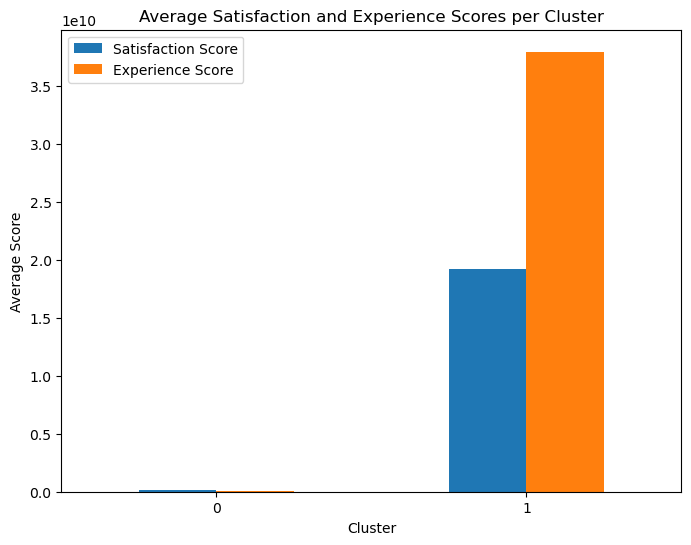

In [28]:
# Plotting the average scores per cluster
cluster_scores.plot(kind='bar', figsize=(8, 6))
plt.title('Average Satisfaction and Experience Scores per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Satisfaction Score', 'Experience Score'])
plt.show()


In [29]:
original_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),experience_column,engagement_column,engagement_score,experience_score,satisfaction_score,cluster_labels
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,171744450.0,8814393.0,36749741.0,308879636.0,0,0,2.747487e+08,4.603619e+06,1.396761e+08,0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,526904238.0,15055145.0,53800391.0,653384965.0,0,1,1.108930e+08,4.626213e+06,5.775962e+07,0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,410692588.0,4215763.0,27883638.0,279807335.0,0,0,7.062421e+07,4.627245e+06,3.762573e+07,0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,749039933.0,12797283.0,43324218.0,846028530.0,0,1,3.942106e+08,4.615843e+06,1.994132e+08,0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,550709500.0,13910322.0,38542814.0,569138589.0,0,1,1.415405e+08,4.627245e+06,7.308388e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,1.311450e+19,27-04-2019 12:29,529.0,29-04-2019 08:23,854.0,158070.0,2.082020e+14,3.366255e+10,3.561370e+13,D72312C,...,801519277.0,3770778.0,43206297.0,154603504.0,0,0,3.856428e+08,4.602461e+06,1.951226e+08,0
106853,7.349880e+18,27-04-2019 12:29,845.0,29-04-2019 12:06,155.0,171428.0,2.082020e+14,3.366880e+10,3.536980e+13,L35995B,...,564536691.0,8735584.0,41173542.0,91157110.0,0,0,1.677063e+08,4.627245e+06,8.616676e+07,0
106854,1.311450e+19,27-04-2019 12:29,686.0,29-04-2019 09:55,359.0,163575.0,2.082010e+14,3.378323e+10,3.594020e+13,T40137A,...,459292393.0,12598131.0,49497056.0,373413691.0,0,1,2.638106e+08,4.614965e+06,1.342128e+08,0
106855,7.277830e+18,27-04-2019 12:29,855.0,29-04-2019 12:27,636.0,172658.0,2.082010e+14,3.366158e+10,3.557300e+13,CELL_208_20_520122_4,...,761130121.0,10056425.0,42971948.0,505377682.0,0,2,3.624986e+08,1.103482e+08,2.364234e+08,0


In [30]:
table_db=original_data[['MSISDN/Number','engagement_score','experience_score','satisfaction_score']]

In [31]:
table_db

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.366496e+10,2.747487e+08,4.603619e+06,1.396761e+08
1,3.368185e+10,1.108930e+08,4.626213e+06,5.775962e+07
2,3.376063e+10,7.062421e+07,4.627245e+06,3.762573e+07
3,3.375034e+10,3.942106e+08,4.615843e+06,1.994132e+08
4,3.369980e+10,1.415405e+08,4.627245e+06,7.308388e+07
...,...,...,...,...
106852,3.366255e+10,3.856428e+08,4.602461e+06,1.951226e+08
106853,3.366880e+10,1.677063e+08,4.627245e+06,8.616676e+07
106854,3.378323e+10,2.638106e+08,4.614965e+06,1.342128e+08
106855,3.366158e+10,3.624986e+08,1.103482e+08,2.364234e+08


In [32]:
table_db=pd.DataFrame(table_db)
table_db

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.366496e+10,2.747487e+08,4.603619e+06,1.396761e+08
1,3.368185e+10,1.108930e+08,4.626213e+06,5.775962e+07
2,3.376063e+10,7.062421e+07,4.627245e+06,3.762573e+07
3,3.375034e+10,3.942106e+08,4.615843e+06,1.994132e+08
4,3.369980e+10,1.415405e+08,4.627245e+06,7.308388e+07
...,...,...,...,...
106852,3.366255e+10,3.856428e+08,4.602461e+06,1.951226e+08
106853,3.366880e+10,1.677063e+08,4.627245e+06,8.616676e+07
106854,3.378323e+10,2.638106e+08,4.614965e+06,1.342128e+08
106855,3.366158e+10,3.624986e+08,1.103482e+08,2.364234e+08


### Exporting Table to Sql

In [33]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pyodbc

In [35]:
conn=pyodbc.connect('Driver={SQL Server};'
                   'Server=DESKTOP-49OUI7N\SQLEXPRESS;'
                   'Database=newdb;'
                   'Trusted_Connection=yes;')

In [36]:
# Create a cursor object
cursor = conn.cursor()

# Define the SQL command to create a new table based on DataFrame columns and data types
create_table_query = '''
    CREATE TABLE Final_Telcom_table (
        MSISDN_Number NUMERIC,
        engagement_score NUMERIC,
        experience_score NUMERIC,
        satisfaction_score NUMERIC
    )
'''

# Execute the SQL command to create the new table
cursor.execute(create_table_query)

# Commit the changes
conn.commit()

# Insert data from the DataFrame into the newly created table
for index, row in table_db.iterrows():
    cursor.execute('INSERT INTO Final_Telcom_Table VALUES (?, ?, ?, ?)', tuple(row))

# Commit the changes after insertion
conn.commit()

# Close the connection
conn.close()


### ScreenShot of of a select query output on the exported table

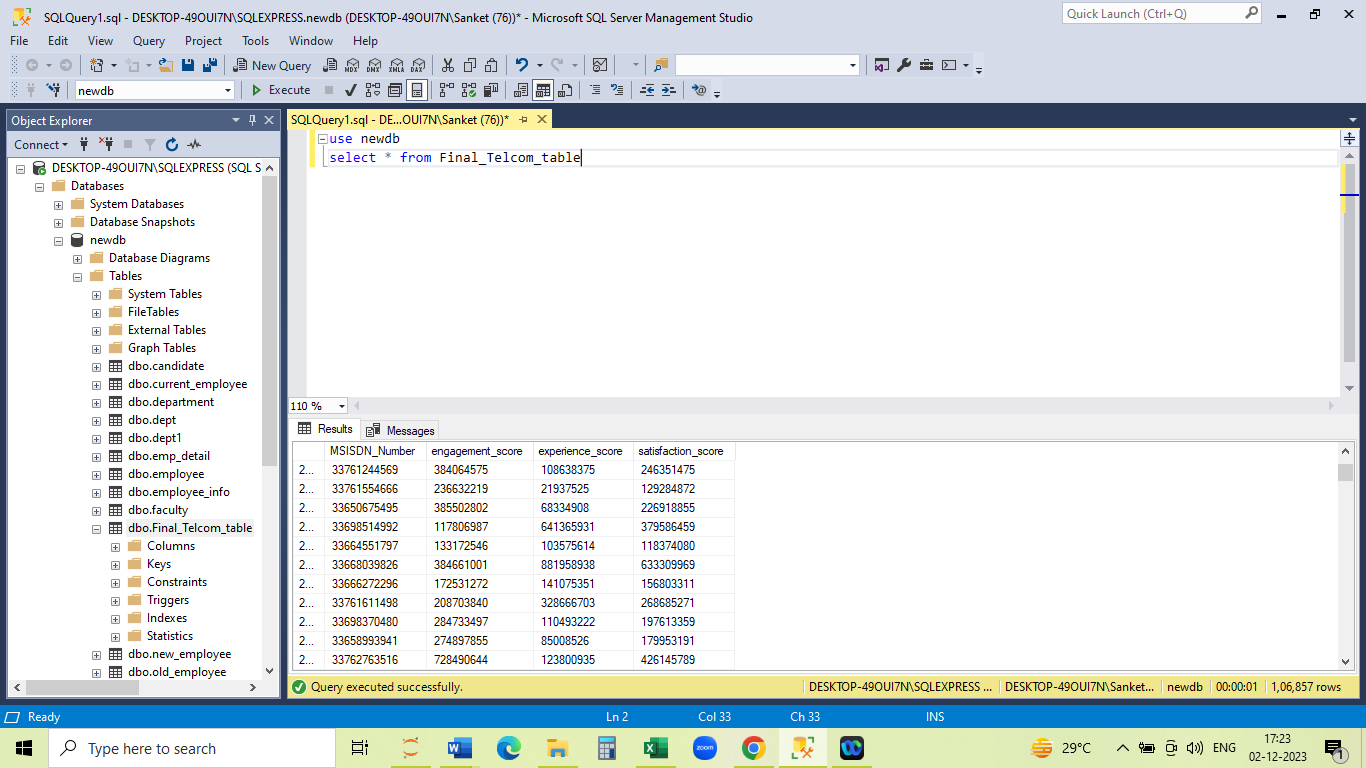